In [1]:
import json # citire fisier
import gensim.downloader as api # word2vec pretrained
import numpy as np # X
import scipy.cluster.hierarchy as shc # hierarchical clustering
import matplotlib.pyplot as plt # vizualizare dendograma
import pandas as pd # date tensorboard
import os # tensorboard
import tensorflow as tf # tensorboard
from sklearn.decomposition import PCA as sklearnPCA # transformate date pentru tensorboard

In [3]:
sentences = []
with open('../../preprocesareVenue/venues_reduced_10.json', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

1368


In [4]:
model = api.load('glove-wiki-gigaword-100')

In [5]:
X = []
wrong_words = 0
total_words = 0

new_sentences = []

for sentence in sentences:
    word_vector = []
    new_sentence = []
    
    for word in sentence:
        total_words += 1
        try:
            word_vector.append(model[word])
            new_sentence.append(word)
        except:
            print(word)
            wrong_words += 1
    leng = len(word_vector)
      
    if (leng > 0):
        avg_vect = np.zeros(100)  
        X.append(avg_vect)
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        if (leng != 1):
            for i in range(0,100):
                avg_vect[i] /= leng 
            
        new_sentences.append(new_sentence)

aeromechanics
anaphor
precedings


In [6]:
print(len(new_sentences))
print(wrong_words)
print(total_words)

1367
3
2164


In [7]:
X = np.array(X)
np.save('X.npy', X) 

In [2]:
X = np.load('X.npy')

## Apply Hierarchical Clustering

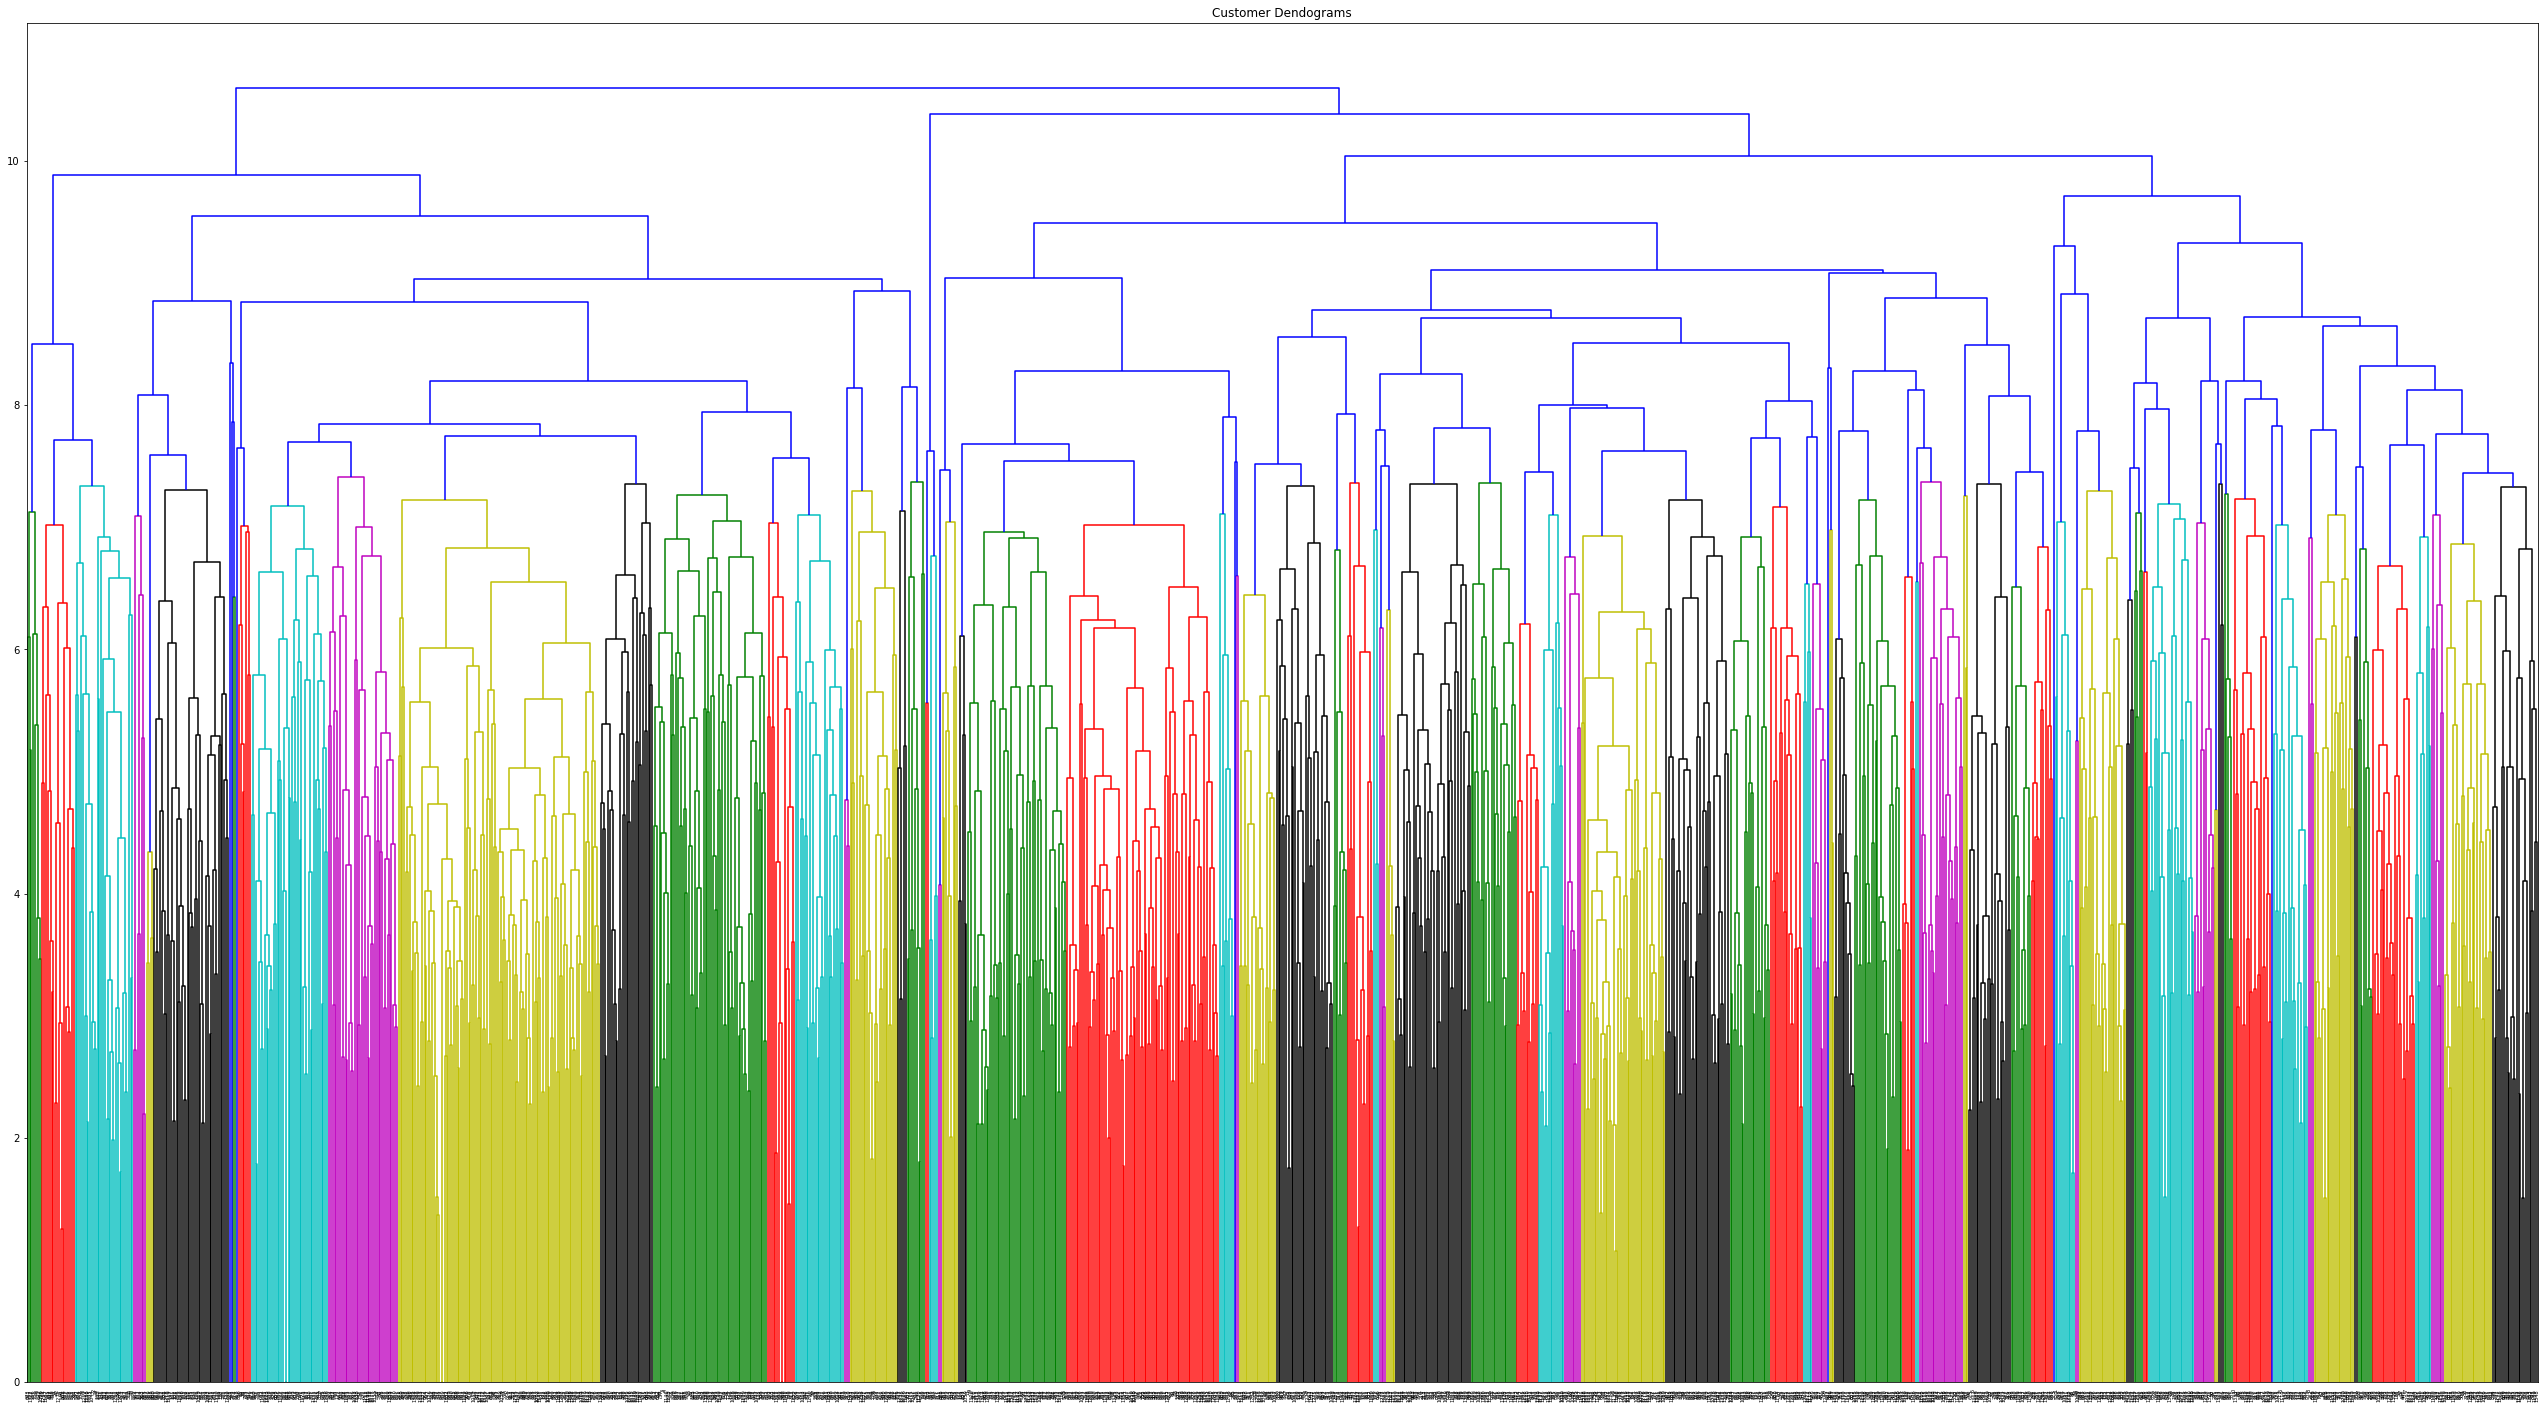

In [10]:
data = X
max_d = 50

plt.figure(figsize=(45, 25))  
plt.title("Customer Dendograms")  
plt.axhline(y=max_d, c='k')
Z = shc.linkage(data, method='complete')
dend = shc.dendrogram(Z)  

## Elbow Method

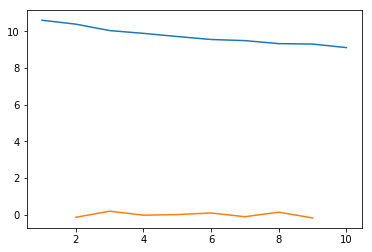

clusters: 3


In [12]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

## Apply Agglomerative Clustering

## Tensorboard

In [ ]:
pca = sklearnPCA(n_components=20) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

PATH = os.getcwd()

LOG_DIR = PATH + '/result/'

# metadata = os.path.join(LOG_DIR, 'cl22.tsv')

pca = sklearnPCA(n_components=50) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    # embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.073823795467428
For n_clusters = 3 The average silhouette_score is : 0.03696185444739459
For n_clusters = 4 The average silhouette_score is : 0.03962518500689083
For n_clusters = 5 The average silhouette_score is : 0.040287708559352695
For n_clusters = 6 The average silhouette_score is : 0.02853961566105983
For n_clusters = 7 The average silhouette_score is : 0.02642067932304037
For n_clusters = 8 The average silhouette_score is : 0.023077244196251345
For n_clusters = 9 The average silhouette_score is : 0.025591745869152065
For n_clusters = 10 The average silhouette_score is : 0.02416916076990431
For n_clusters = 11 The average silhouette_score is : 0.028111517327406587
For n_clusters = 12 The average silhouette_score is : 0.024341457405834693
For n_clusters = 13 The average silhouette_score is : 0.021176032826028097
For n_clusters = 14 The average silhouette_score is

c:\users\cristina\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 22 The average silhouette_score is : 0.02774972516686898


c:\users\cristina\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 23 The average silhouette_score is : 0.024994684014804935


c:\users\cristina\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 24 The average silhouette_score is : 0.026690667928024513


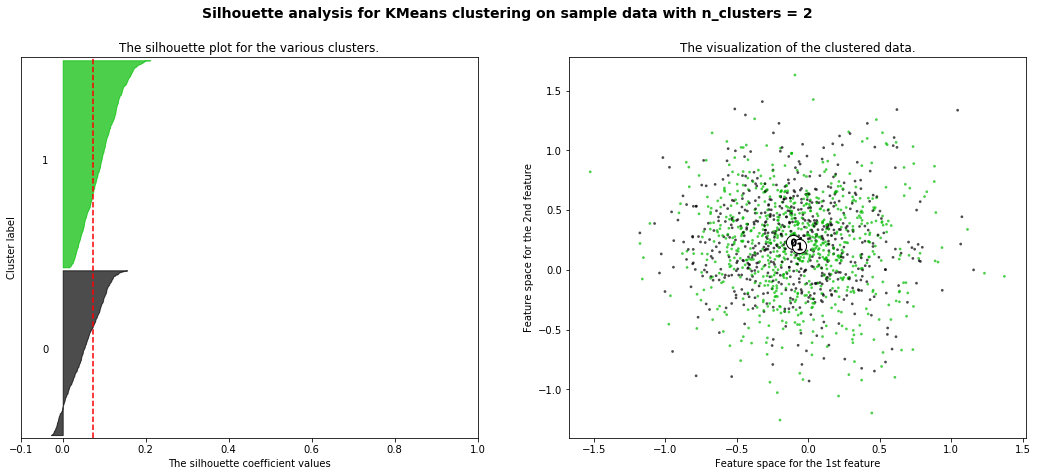

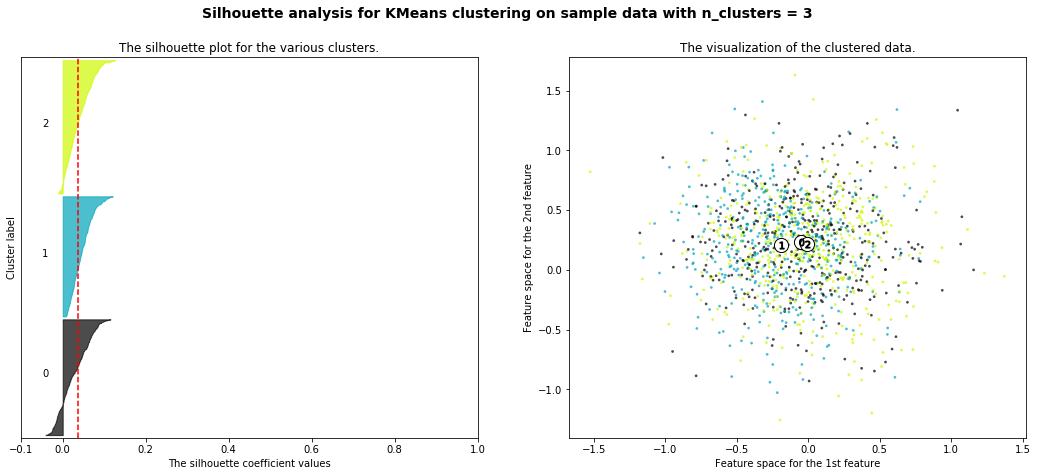

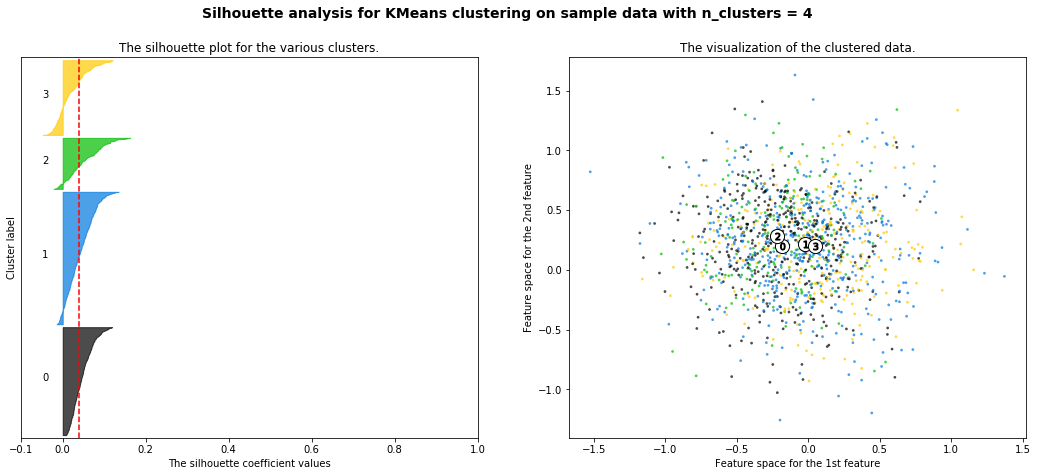

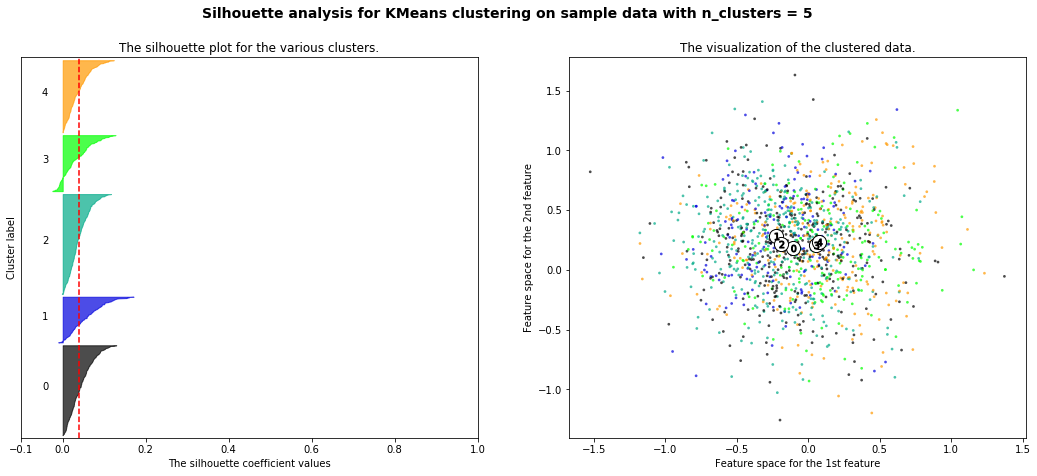

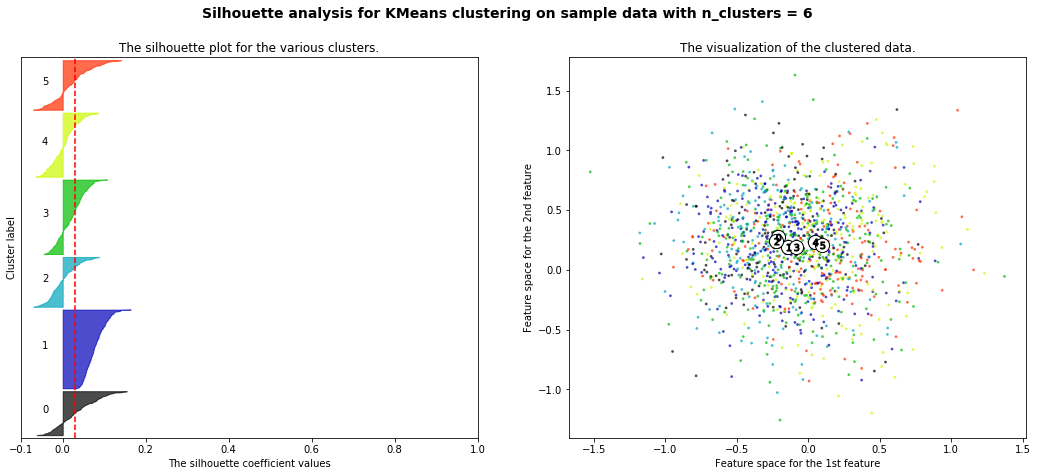

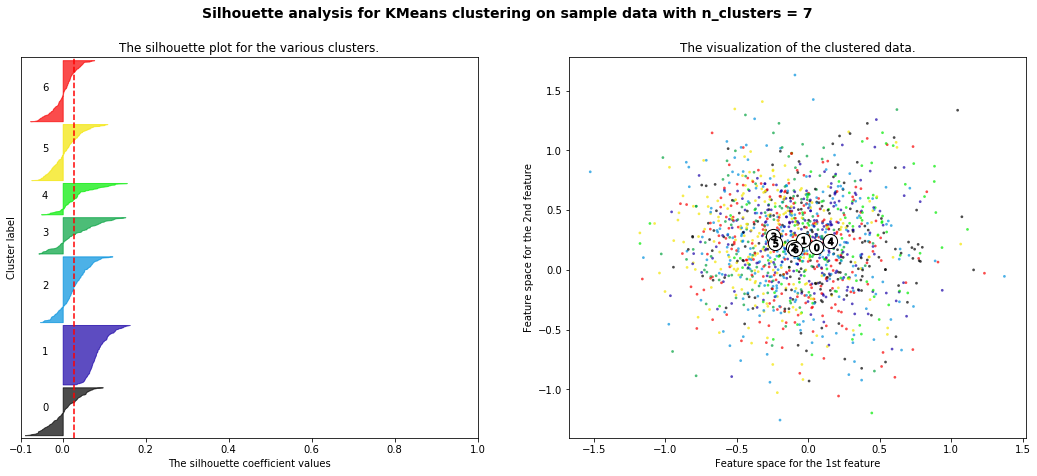

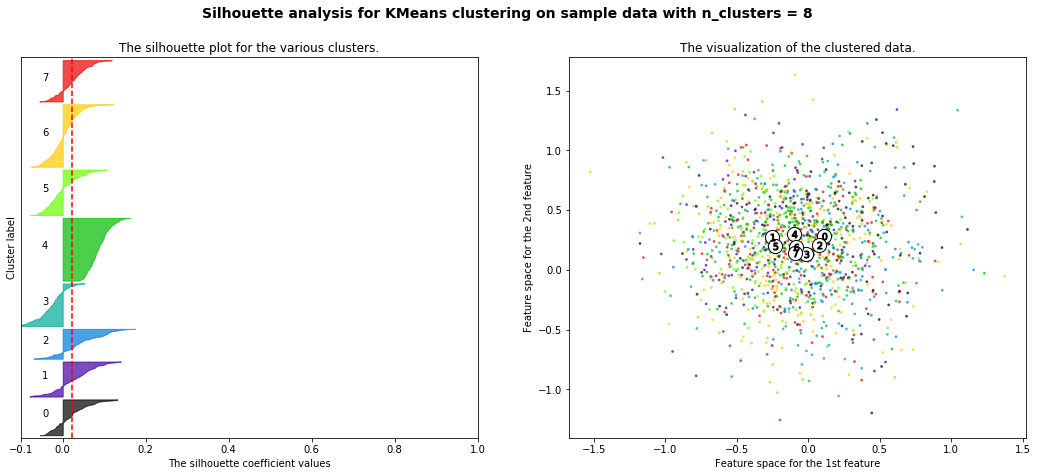

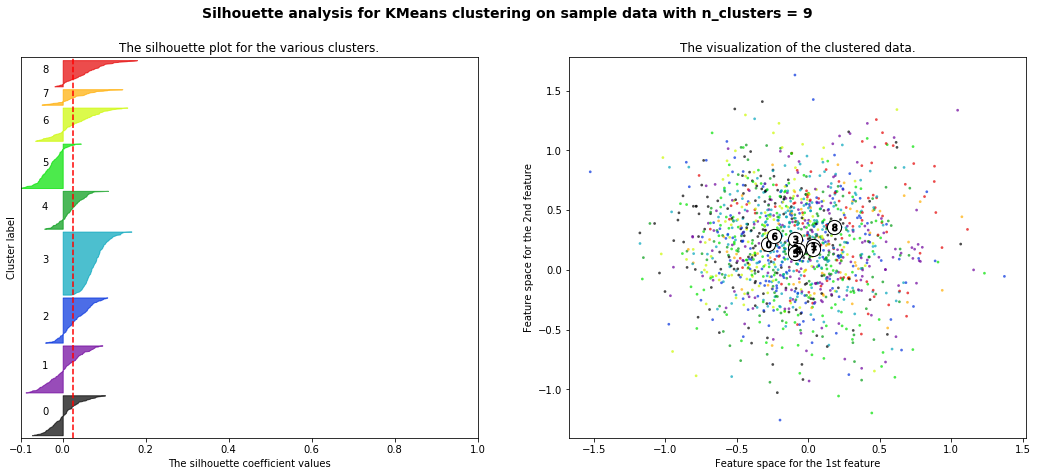

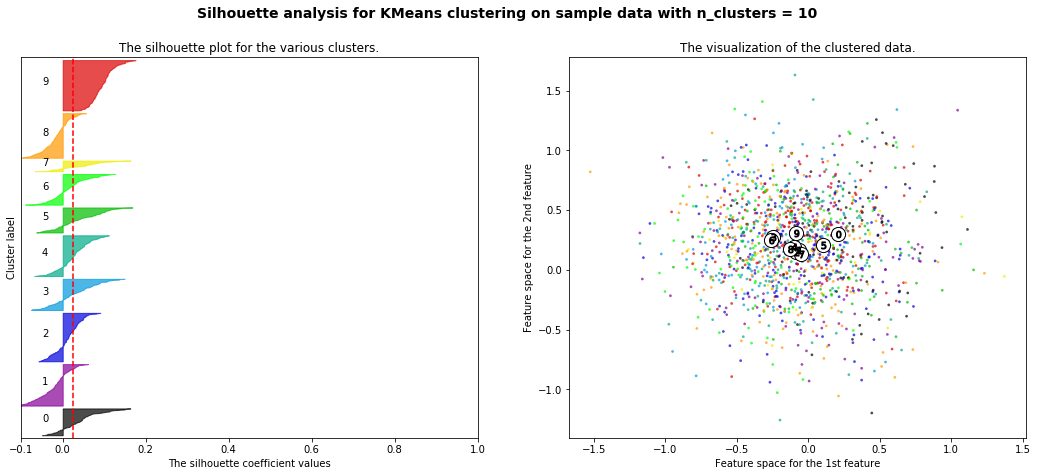

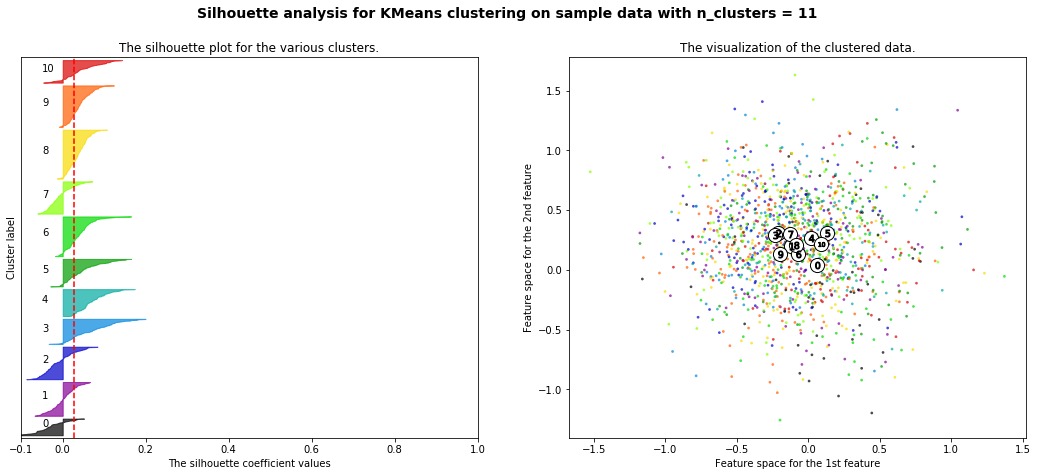

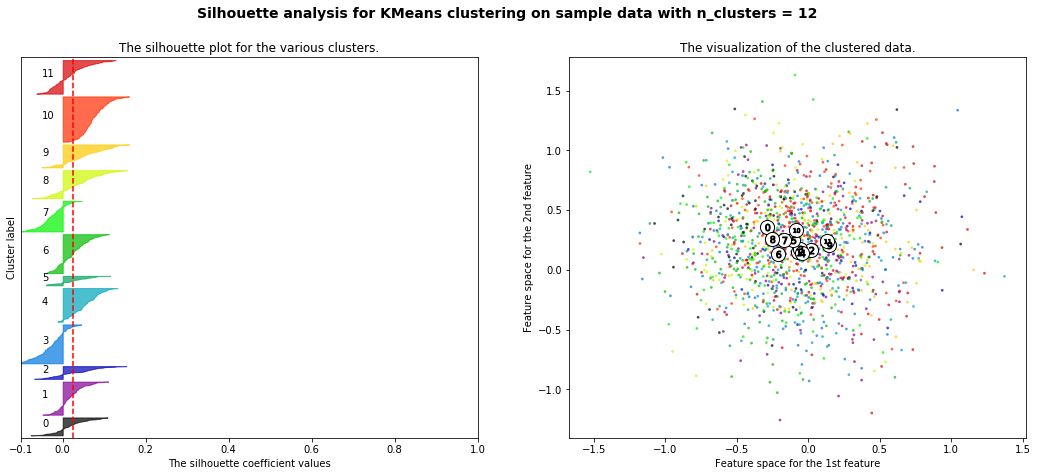

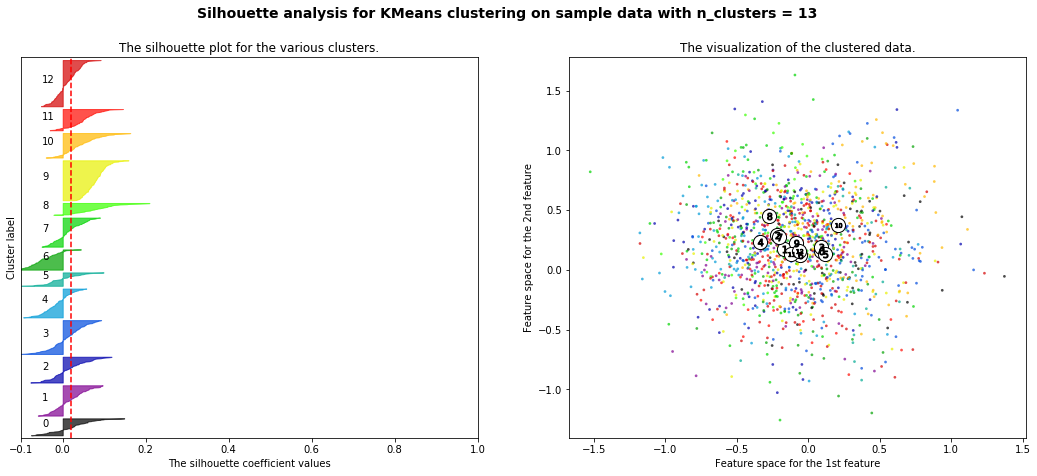

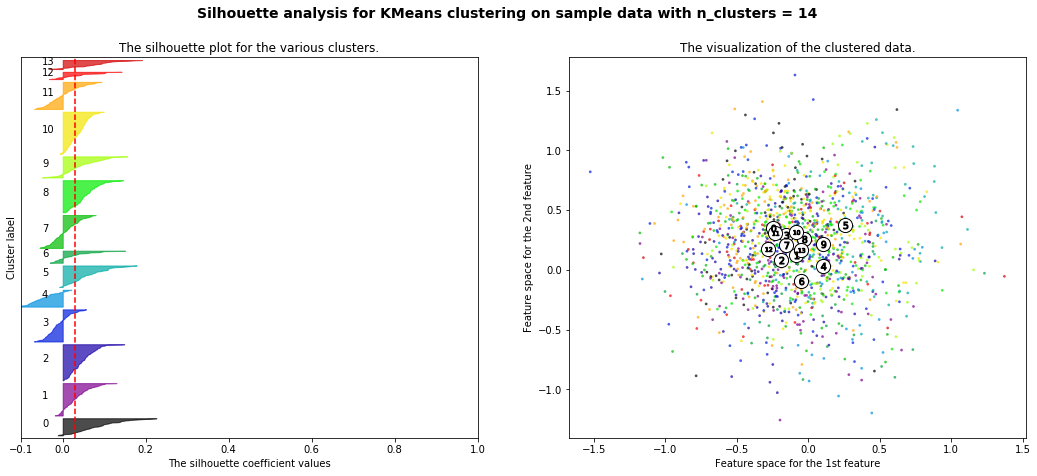

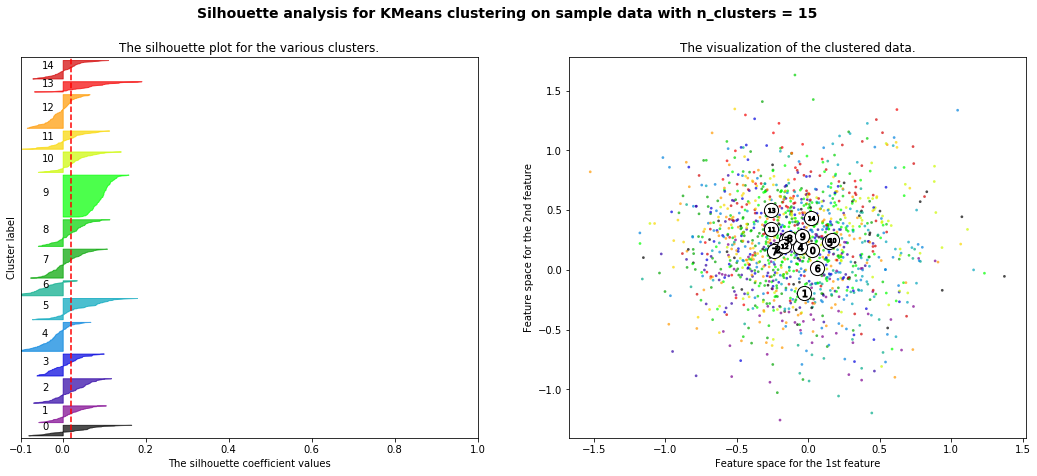

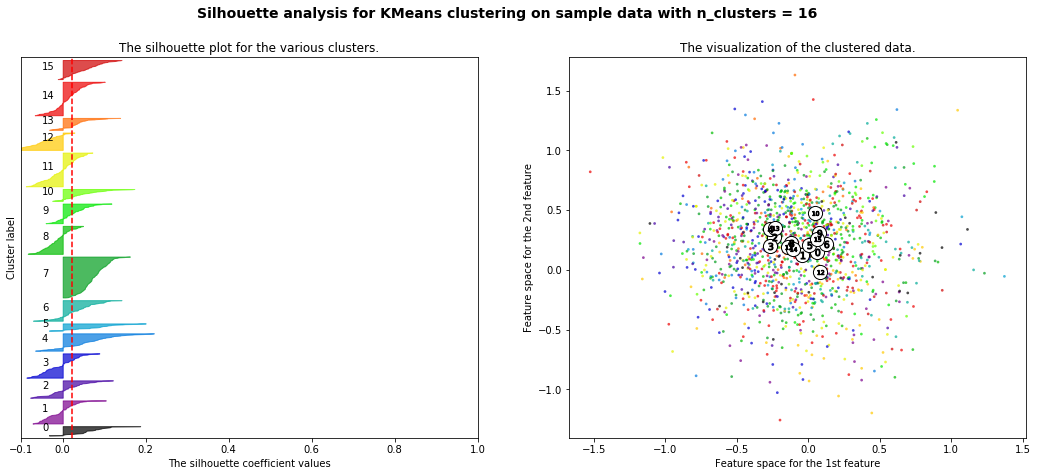

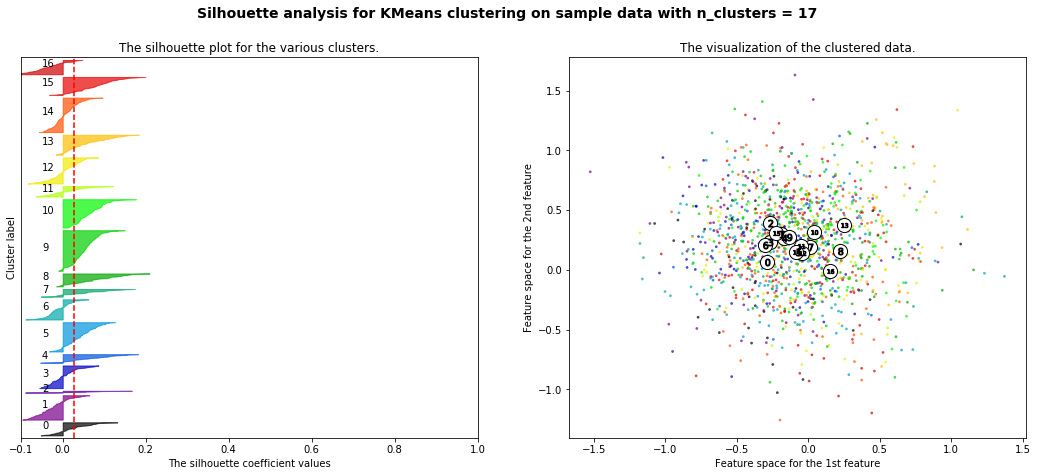

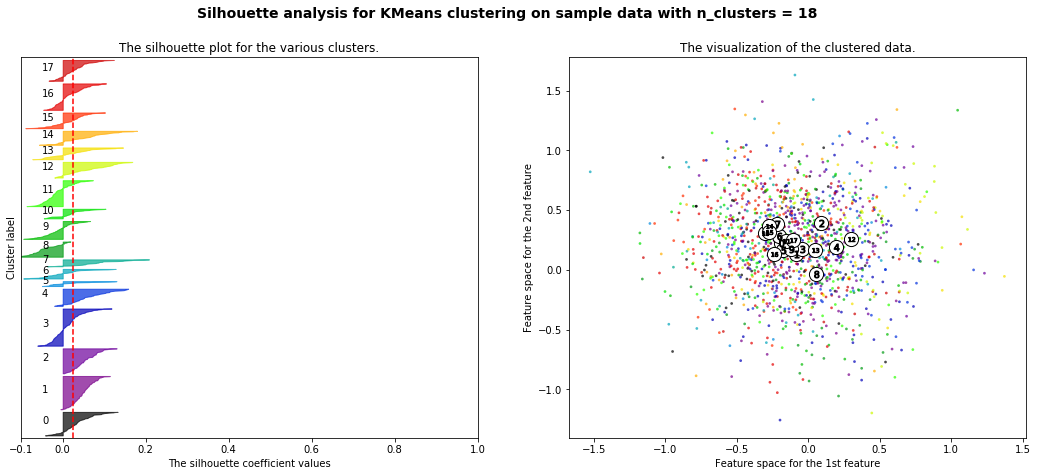

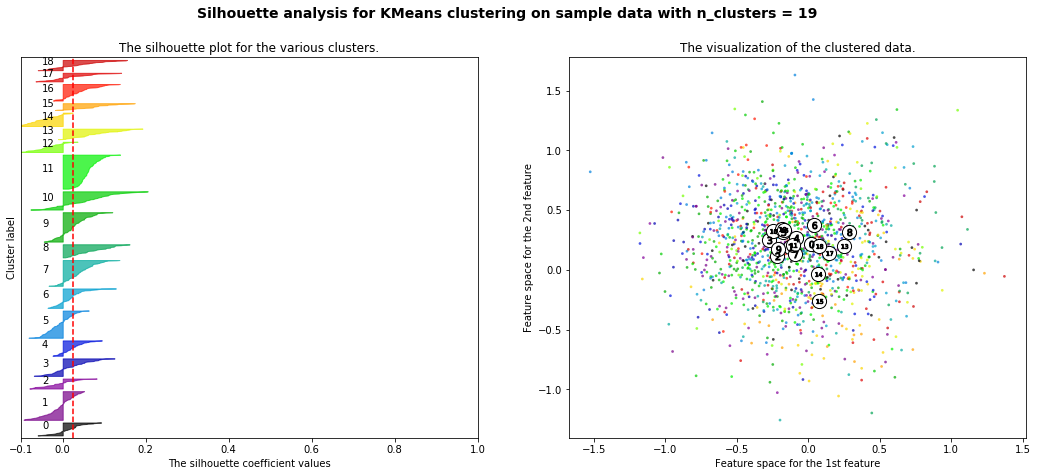

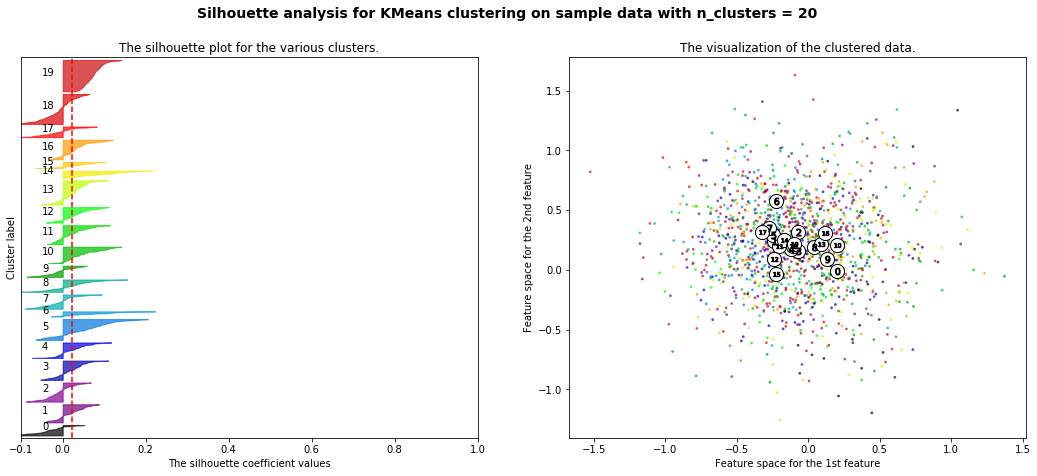

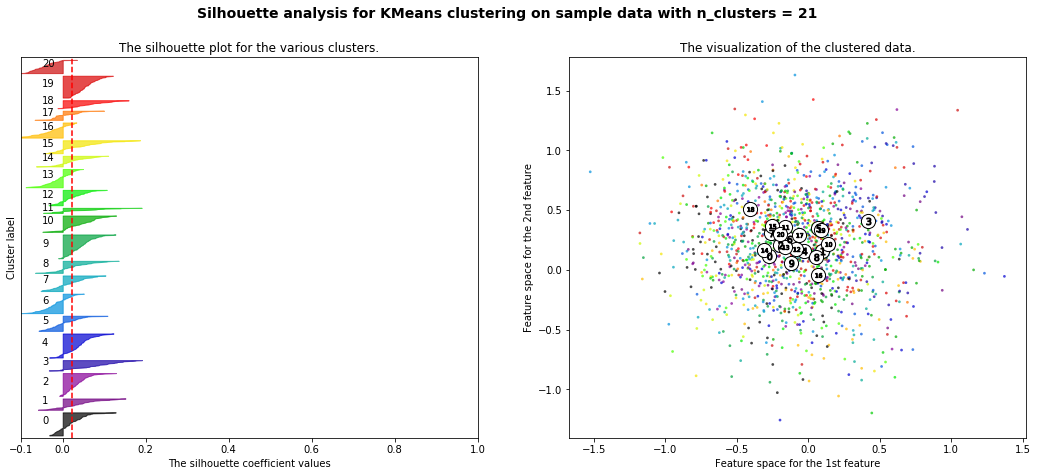

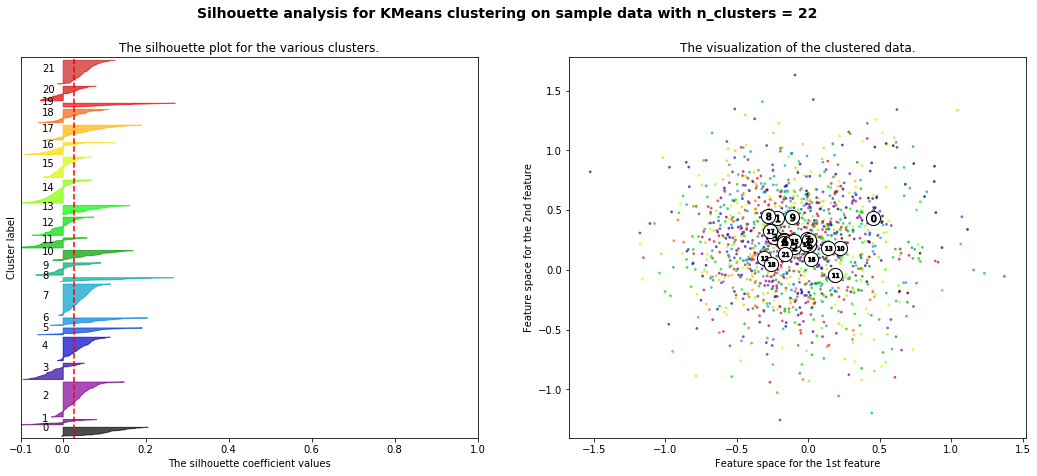

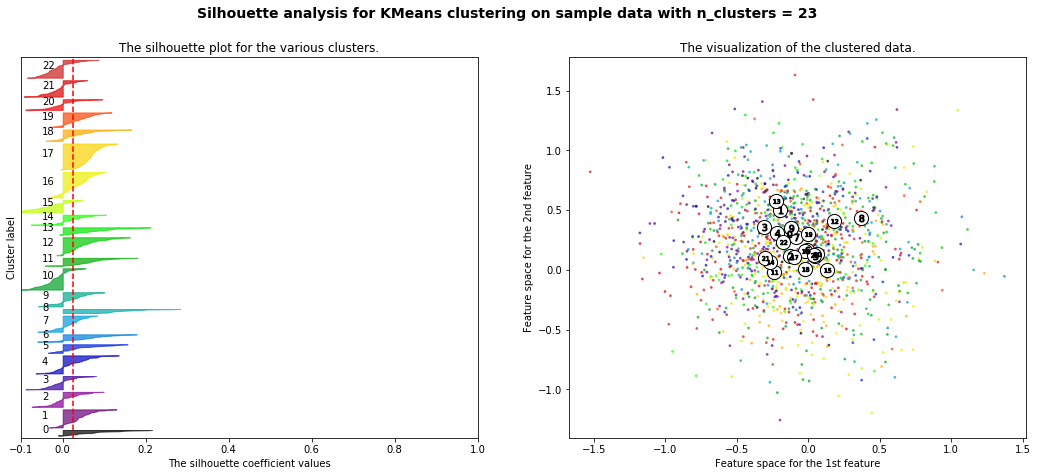

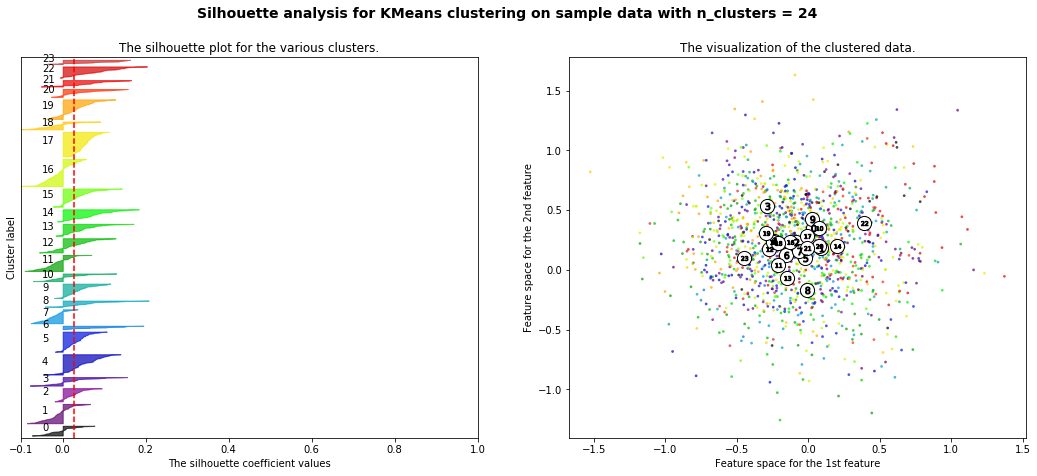

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

#range_n_clusters = [72, 73, 74, 75, 76]

for n_clusters in range(2,25):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [13]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch
from pyclustering.samples.definitions import FCPS_SAMPLES

sample = X
print(len(sample))
search_instance = silhouette_ksearch(sample, 2, 35, algorithm=silhouette_ksearch_type.KMEANS).process()
amount = search_instance.get_amount()
scores = search_instance.get_scores()
for i in range(2,31):
    print("Score " + str(i) + " " + str(scores[i]))
initial_centers = kmeans_plusplus_initializer(sample, amount).initialize()
kmeans_instance = kmeans(sample, initial_centers).process()
clusters = kmeans_instance.get_clusters()

1367
Score 2 0.07227012669973304
Score 3 nan
Score 4 0.0731068345014499
Score 5 nan
Score 6 nan
Score 7 0.05063625612986017
Score 8 0.04980060837473713
Score 9 nan
Score 10 nan
Score 11 nan
Score 12 nan
Score 13 nan
Score 14 nan
Score 15 nan
Score 16 nan
Score 17 nan
Score 18 nan
Score 19 nan
Score 20 nan
Score 21 nan
Score 22 nan
Score 23 nan
Score 24 nan
Score 25 nan
Score 26 nan
Score 27 nan
Score 28 nan
Score 29 nan
Score 30 nan


In [16]:
from pyclustering.cluster.elbow import elbow

# read sample 'Simple3' from file (sample contains four clusters)
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sample= X
# create instance of Elbow method using K value from 1 to 10.
kmin, kmax = 1, 30
elbow_instance = elbow(sample, kmin, kmax)
# process input data and obtain results of analysis
elbow_instance.process()
amount_clusters = elbow_instance.get_amount()   # most probable amount of clusters
wce = elbow_instance.get_wce()                  # total within-cluster errors for each K
# perform cluster analysis using K-Means algorithm
centers = kmeans_plusplus_initializer(sample, amount_clusters).initialize()
kmeans_instance = kmeans(sample, centers)
kmeans_instance.process()
# obtain clustering results and visualize them
clusters = kmeans_instance.get_clusters()
centers = kmeans_instance.get_centers()
print(len(clusters))
#kmeans_visualizer.show_clusters(sample, clusters, centers)
#https://pyclustering.github.io/docs/0.8.2/html/d3/d70/classpyclustering_1_1cluster_1_1elbow_1_1elbow.html#details

8


In [17]:
from gap_statistic import OptimalK
#X, y = make_blobs(n_samples=int(1e5), n_features=2, centers=3, random_state=100)
optimalK = OptimalK(parallel_backend='joblib')
optimalK(X, cluster_array=np.arange(1, 25))
#https://github.com/milesgranger/gap_statistic/blob/master/gap_statistic/optimalK.py

1

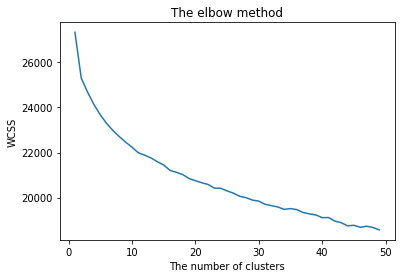

In [5]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    # kmeans.inertia_ sum of squared distances to the closest centroid for all observations in the training set
    wcss.append(kmeans.inertia_) 

plt.plot(range(1,50), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

#https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

In [6]:
print(len(X))

1367
